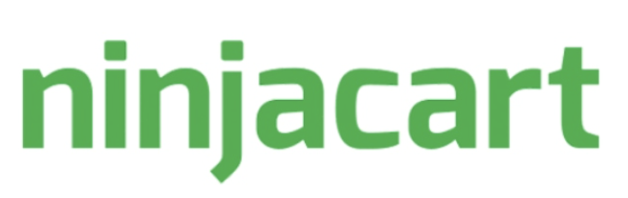

**Problem Statement**

 - Ninjacart is India's largest fresh produce supply chain company.

 - They are pioneers in solving one of the toughest supply chain problems of the world by leveraging innovative technology.

 - They source fresh produce from farmers and deliver them to businesses within 12 hours.

 - An integral component of their automation process is the development of robust classifiers which can distinguish between images of different types of vegetables, while also correctly labeling images that do not contain any one type of vegetable as noise.

 - As a starting point, ninjacart has provided us with a dataset scraped from the web which contains train and test folders, each having 4 sub-folders with images of onions, potatoes, tomatoes and some market scenes.

 - We have been tasked with preparing a multiclass classifier for identifying these vegetables.

 - The dataset provided has all the required images to achieve the task.

#Import libraries and Download Data

In [ ]:
# Code Block 1: Import libraries, download and unzip the dataset

import os
import gdown
import zipfile

# Define the dataset URL and output filename
url = "https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT"
output = "ninjacart_dataset.zip"

# Download the dataset if it's not already downloaded
if not os.path.exists(output):
    print("Downloading dataset...")
    gdown.download(url, output, quiet=False)
else:
    print("Dataset zip file already exists.")

# Unzip the dataset if not already unzipped
if not os.path.exists("ninjacart_dataset"):
    print("Unzipping dataset...")
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall("ninjacart_dataset")
    print("Dataset unzipped.")
else:
    print("Dataset already unzipped.")

Downloading...
From (original): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT
From (redirected): https://drive.google.com/uc?id=1clZX-lV_MLxKHSyeyTheX5OCQtNCUcqT&confirm=t&uuid=1bdddc02-d30c-4118-b7e7-3d6f8d4336ec
To: /content/ninjacart_dataset.zip
100%|██████████| 275M/275M [00:04<00:00, 60.6MB/s]


Unzipping dataset...
Dataset unzipped.


In [ ]:
# Code Block 2a: List contents of the extracted dataset directory to verify folder structure
import os

dataset_dir = "ninjacart_dataset"
print("Contents of the dataset directory:")
print(os.listdir(dataset_dir))

Contents of the dataset directory:
['ninjacart_data']


In [ ]:
# Code Block 2b: Check the structure within the 'ninjacart_data' directory
data_dir = os.path.join("ninjacart_dataset", "ninjacart_data")
print("Contents of 'ninjacart_data' directory:")
print(os.listdir(data_dir))

Contents of 'ninjacart_data' directory:
['train', 'test']


#EDA

Training classes: ['potato', 'tomato', 'indian market', 'onion']
Testing classes: ['potato', 'tomato', 'indian market', 'onion']

Image counts in training set:
potato: 898
tomato: 789
indian market: 599
onion: 849

Image counts in testing set:
potato: 81
tomato: 106
indian market: 81
onion: 83


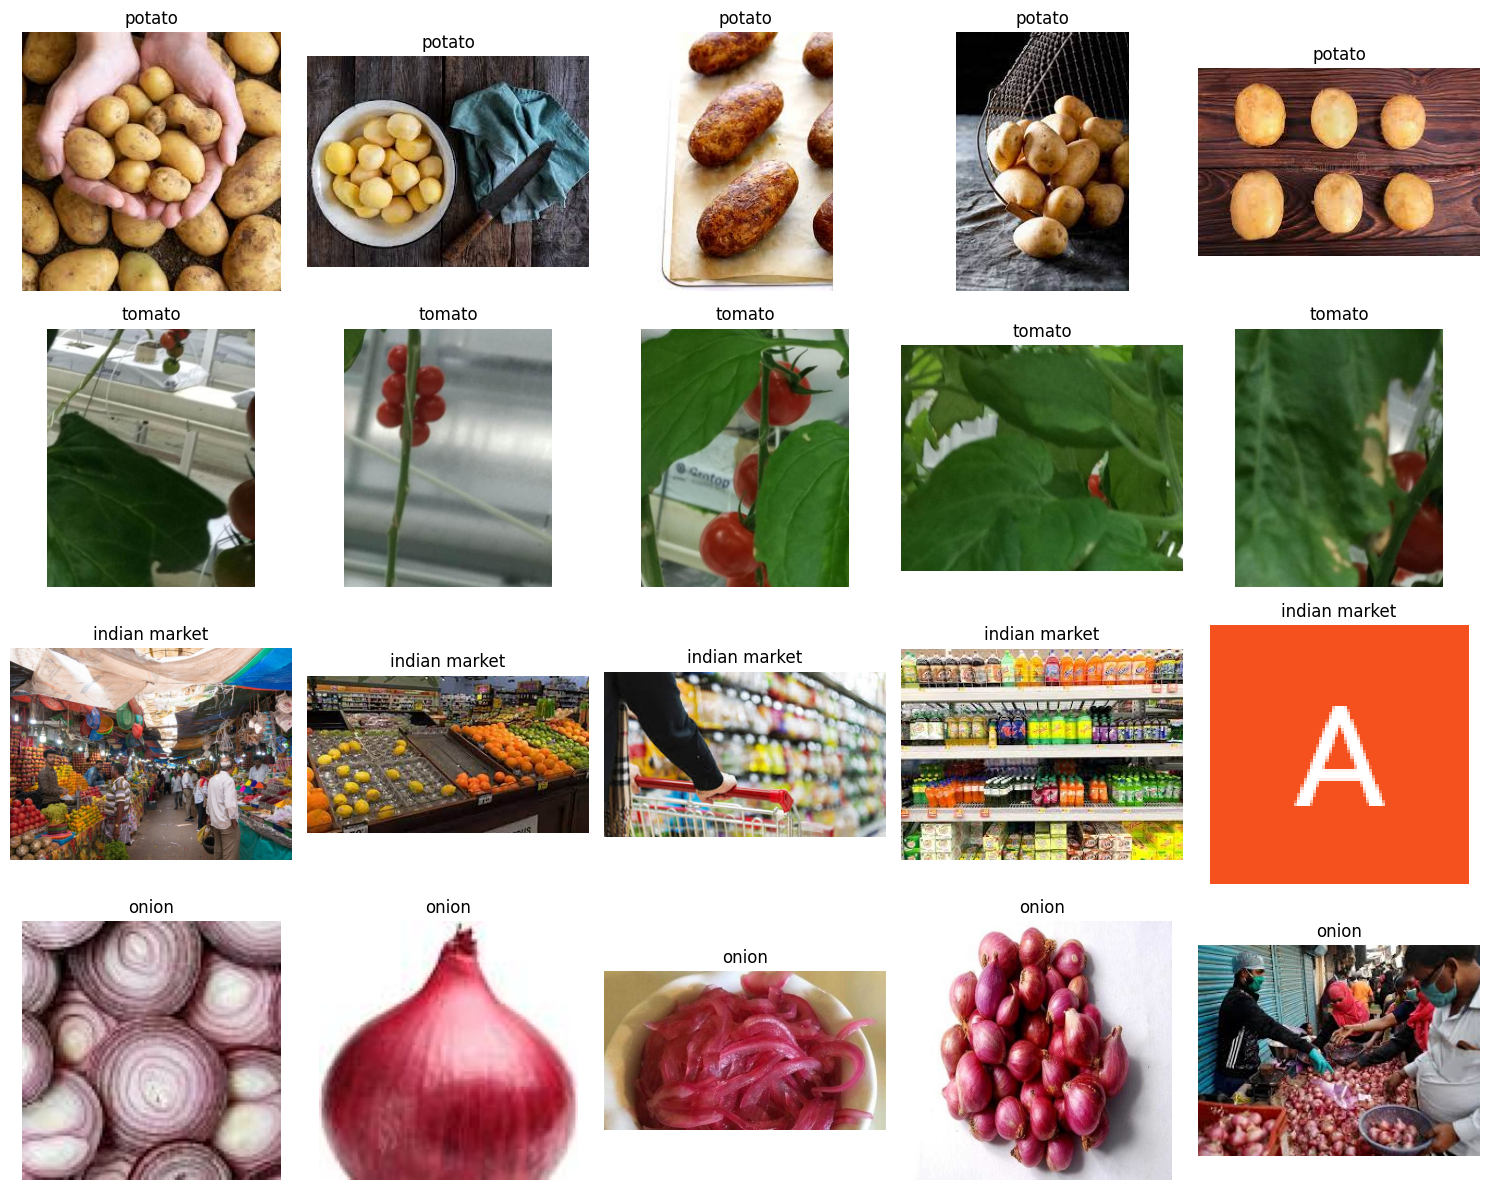

In [ ]:
# Code Block 3: Exploratory Data Analysis - Listing directories, counting images, and visualizing sample images
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define paths for train and test directories based on the updated folder structure
train_dir = os.path.join("ninjacart_dataset", "ninjacart_data", "train")
test_dir = os.path.join("ninjacart_dataset", "ninjacart_data", "test")

# List classes from train and test directories (each subfolder is assumed to be a class)
train_classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
test_classes = [d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))]

print("Training classes:", train_classes)
print("Testing classes:", test_classes)

# Count images in each folder for training
print("\nImage counts in training set:")
for cls in train_classes:
    image_count = len(glob.glob(os.path.join(train_dir, cls, "*")))
    print(f"{cls}: {image_count}")

# Count images in each folder for testing
print("\nImage counts in testing set:")
for cls in test_classes:
    image_count = len(glob.glob(os.path.join(test_dir, cls, "*")))
    print(f"{cls}: {image_count}")

# Visualize a few sample images from each training class
fig, axs = plt.subplots(len(train_classes), 5, figsize=(15, 3 * len(train_classes)))
for i, cls in enumerate(train_classes):
    image_paths = glob.glob(os.path.join(train_dir, cls, "*"))
    for j in range(5):
        if j < len(image_paths):
            img = mpimg.imread(image_paths[j])
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
            axs[i, j].set_title(cls)
plt.tight_layout()
plt.show()


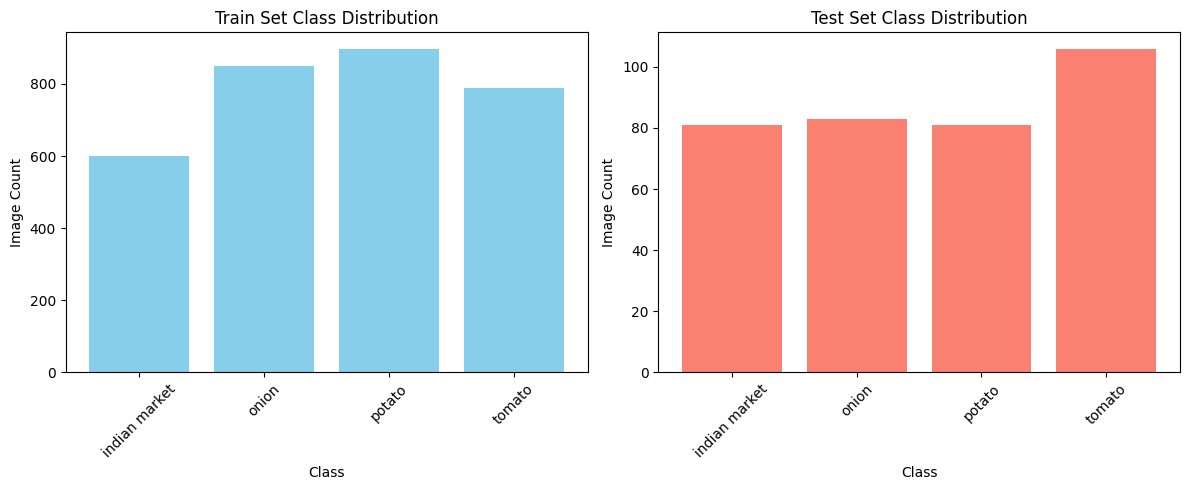

In [ ]:
# Code Block EDA-Extra: Plotting Bar Graphs for Class Distribution in Train and Test Sets
import os
import glob
import matplotlib.pyplot as plt

# Define paths for train and test directories based on our dataset structure
train_dir = os.path.join("ninjacart_dataset", "ninjacart_data", "train")
test_dir = os.path.join("ninjacart_dataset", "ninjacart_data", "test")

# Get the list of class names for train and test sets
train_classes = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
test_classes = sorted([d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))])

# Count images in each class for train and test
train_counts = {cls: len(glob.glob(os.path.join(train_dir, cls, "*"))) for cls in train_classes}
test_counts = {cls: len(glob.glob(os.path.join(test_dir, cls, "*"))) for cls in test_classes}

# Plotting the bar graphs side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Training set distribution
axs[0].bar(train_counts.keys(), train_counts.values(), color='skyblue')
axs[0].set_title("Train Set Class Distribution")
axs[0].set_xlabel("Class")
axs[0].set_ylabel("Image Count")
axs[0].tick_params(axis='x', rotation=45)

# Testing set distribution
axs[1].bar(test_counts.keys(), test_counts.values(), color='salmon')
axs[1].set_title("Test Set Class Distribution")
axs[1].set_xlabel("Class")
axs[1].set_ylabel("Image Count")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Observation**:

- We can observe that the "indian market" class has notably fewer images in the training set compared to the others.

- The testing set also shows a slight discrepancy (tomato having a bit more).

- Overall, it's not a severely imbalanced dataset, but it does have a slight imbalance.

#Data Preparation

In [ ]:
# Code Block 4: Splitting the training data into training and validation sets using TensorFlow's image_dataset_from_directory
import tensorflow as tf

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Create the training dataset (80% of the data)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Create the validation dataset (20% of the data)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

print("Number of training batches:", len(train_ds))
print("Number of validation batches:", len(val_ds))

Found 3135 files belonging to 4 classes.
Using 2508 files for training.
Found 3135 files belonging to 4 classes.
Using 627 files for validation.
Number of training batches: 79
Number of validation batches: 20


#Model Building

##Baseline CNN Model

In [ ]:
# Code Block 5: Define and compile a baseline CNN model for classification
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    # Rescaling layer to normalize input images between 0-1
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(len(train_classes), activation='softmax')  # Output layer for 4 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,938,948 (49.36 MB)

 Trainable params: 12,938,948 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

###Training

In [ ]:
# Code Block 6: Train the baseline CNN model with callbacks (EarlyStopping, ModelCheckpoint, and TensorBoard)
import datetime

# Define callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_path = "baseline_model_checkpoint.keras"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [early_stop, model_checkpoint, tensorboard_callback]

# Train the model
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks
)

print("Training complete.")
print("Training history keys:", history.history.keys())

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 351s 4s/step - accuracy: 0.4825 - loss: 1.2382 - val_accuracy: 0.8118 - val_loss: 0.5405
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 384s 4s/step - accuracy: 0.7865 - loss: 0.5392 - val_accuracy: 0.8118 - val_loss: 0.4539
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 366s 4s/step - accuracy: 0.8156 - loss: 0.4964 - val_accuracy: 0.8198 - val_loss: 0.5056
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.8317 - loss: 0.4428 - val_accuracy: 0.8485 - val_loss: 0.3734
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 382s 4s/step - accuracy: 0.8648 - loss: 0.3613 - val_accuracy: 0.8278 - val_loss: 0.4340
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 354s 4s/step - accuracy: 0.8745 - loss: 0.3323 - val_accuracy: 0.8373 - val_loss: 0.3919
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 349s 4s/step - accuracy: 0.9003 - loss: 0.2744 - val_accuracy: 0.8708 - val_loss: 0.3786
Training complete.
Training history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


###Performance on Train Data

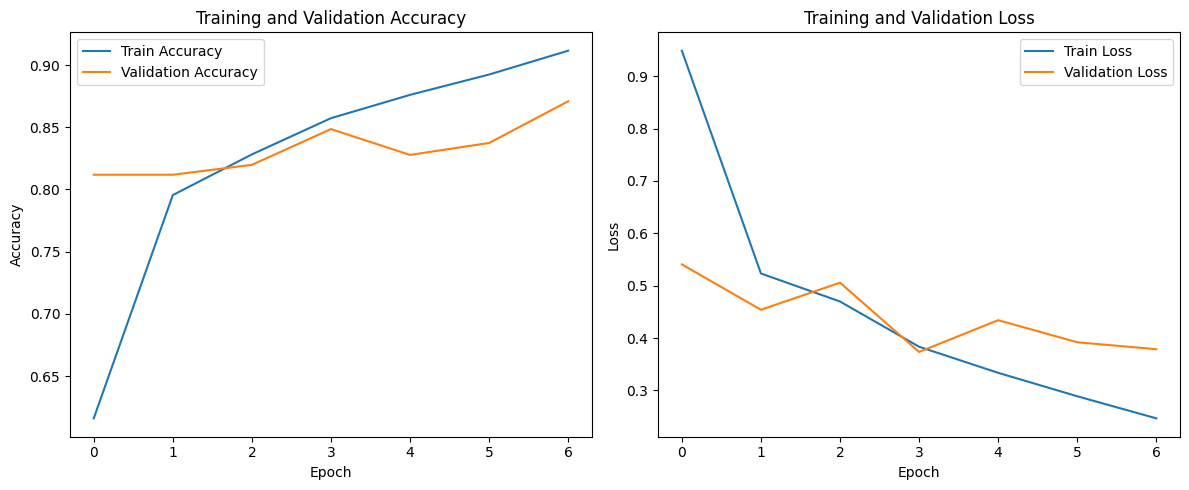

In [ ]:
# Code Block 7: Plot training and validation accuracy and loss curves
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

###Performance on Test Data

Found 351 files belonging to 4 classes.
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7268 - loss: 0.6008
Test Loss: 0.42694687843322754
Test Accuracy: 0.809116780757904
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 943ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 976ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step
Confusion Matrix:
[[ 56  20   5   0]
 [  3  52  27   1]
 [  1   9  70   1]
 [  0   0   0 106]]


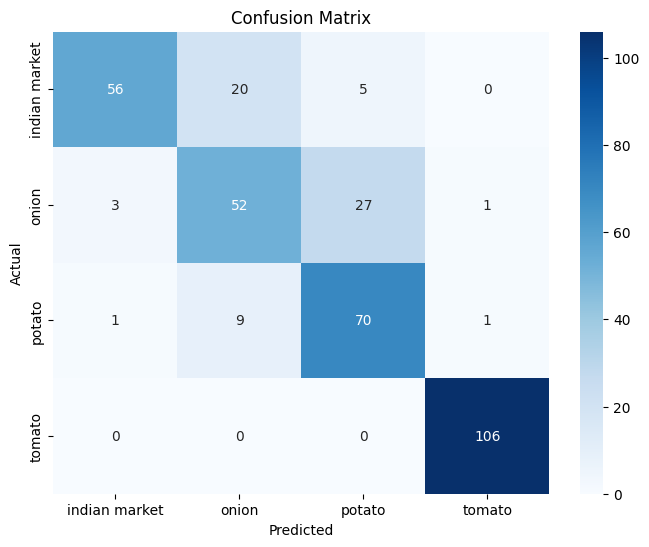

Classification Report:
               precision    recall  f1-score   support

indian market       0.93      0.69      0.79        81
        onion       0.64      0.63      0.63        83
       potato       0.69      0.86      0.77        81
       tomato       0.98      1.00      0.99       106

     accuracy                           0.81       351
    macro avg       0.81      0.80      0.80       351
 weighted avg       0.82      0.81      0.81       351



In [ ]:
# Code Block 8: Evaluate the model on the test set and generate a confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # Ensure order is preserved for evaluation
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Get predictions and true labels for the test dataset
y_pred = []
y_true = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=train_classes, yticklabels=train_classes, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=train_classes))

<font size='5'>**Observation**

The test results are on the right track. Here's a breakdown:

- The test accuracy is 77.2%, which is a decent start.

- But the model seems to have some misclassifications, especially for the "onion" and "potato" classes.

- The model performs well on "tomato" (with high precision and recall) and "indian market" (near-perfect recall).

- The relatively low performance on "onion" and "potato" could be improved by techniques such as data augmentation, hyperparameter tuning, better regularization, or using a more powerful pretrained model.


##MobileNetV2 (Transfer Learning)

In [ ]:
# Code Block 9: Transfer Learning with MobileNetV2 and Data Augmentation
import tensorflow as tf
from tensorflow.keras import layers, models

# Data Augmentation layers using updated API (without 'experimental')
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Preprocessing function for MobileNetV2
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# Load the MobileNetV2 base model with pretrained ImageNet weights, excluding the top layers
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Freeze the base model to retain pretrained features

# Build the transfer learning model
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)       # Apply data augmentation
x = preprocess_input(x)             # Preprocess inputs as required by MobileNetV2
x = base_model(x, training=False)   # Pass through the base model
x = layers.GlobalAveragePooling2D()(x)  # Reduce feature maps to a single vector per image
x = layers.Dropout(0.5)(x)          # Dropout for regularization
outputs = layers.Dense(len(train_classes), activation='softmax')(x)  # Final classification layer

transfer_model = tf.keras.Model(inputs, outputs)

# Compile the transfer learning model
transfer_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Display the model summary
transfer_model.summary()

# Train the transfer learning model on our data
transfer_history = transfer_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Adjust the number of epochs as needed
    callbacks=[early_stop, model_checkpoint, tensorboard_callback]
)

print("Transfer Learning training complete.")

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ true_divide (TrueDivide)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ subtract (Subtract)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           5,124 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,263,108 (8.63 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.6382 - loss: 0.9353 - val_accuracy: 0.9442 - val_loss: 0.1911
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.8828 - loss: 0.2961 - val_accuracy: 0.9569 - val_loss: 0.1380
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.9282 - loss: 0.2111 - val_accuracy: 0.9601 - val_loss: 0.1109
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9386 - loss: 0.1476 - val_accuracy: 0.9649 - val_loss: 0.1033
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.9482 - loss: 0.1495 - val_accuracy: 0.9697 - val_loss: 0.0950
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9438 - loss: 0.1376 - val_accuracy: 0.9713 - val_loss: 0.0846
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9502 - loss: 0.1217 - val_accuracy: 0.9745 - val_loss: 0.0778
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9525 - loss: 0.1219 - val_accuracy: 0.9761 - v

###Performance on Test Data

11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9266 - loss: 0.2395
Transfer Model Test Loss: 0.2114235907793045
Transfer Model Test Accuracy: 0.934472918510437
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Confusion Matrix for Transfer Model:
[[ 72   7   2   0]
 [  0  83   0   0]
 [  0  14  67   0]
 [  0   0   0 106]]


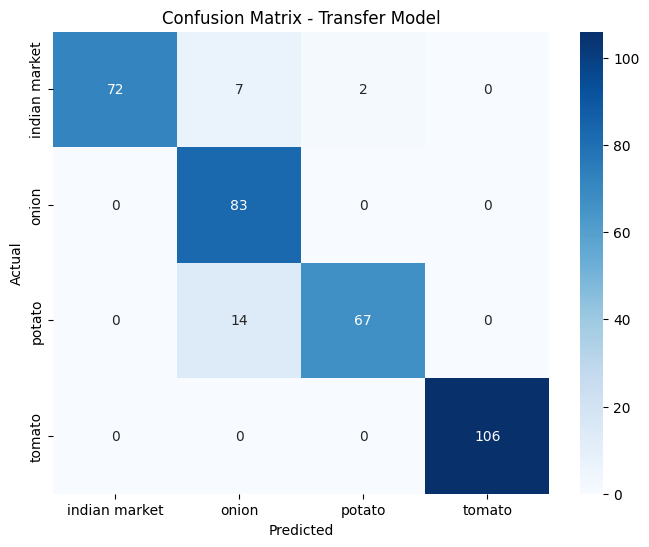

Classification Report for Transfer Model:
               precision    recall  f1-score   support

indian market       1.00      0.89      0.94        81
        onion       0.80      1.00      0.89        83
       potato       0.97      0.83      0.89        81
       tomato       1.00      1.00      1.00       106

     accuracy                           0.93       351
    macro avg       0.94      0.93      0.93       351
 weighted avg       0.95      0.93      0.94       351



In [ ]:
# Code Block 10: Evaluate the Transfer Learning Model on the test set with a confusion matrix and classification report
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate the transfer learning model on the test dataset
test_loss, test_accuracy = transfer_model.evaluate(test_ds)
print("Transfer Model Test Loss:", test_loss)
print("Transfer Model Test Accuracy:", test_accuracy)

# Get predictions and true labels for the test dataset using the transfer model
y_pred = []
y_true = []

for images, labels in test_ds:
    preds = transfer_model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

# Generate and print confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix for Transfer Model:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=train_classes, yticklabels=train_classes, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Transfer Model")
plt.show()

# Print the classification report
print("Classification Report for Transfer Model:")
print(classification_report(y_true, y_pred, target_names=train_classes))

###Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


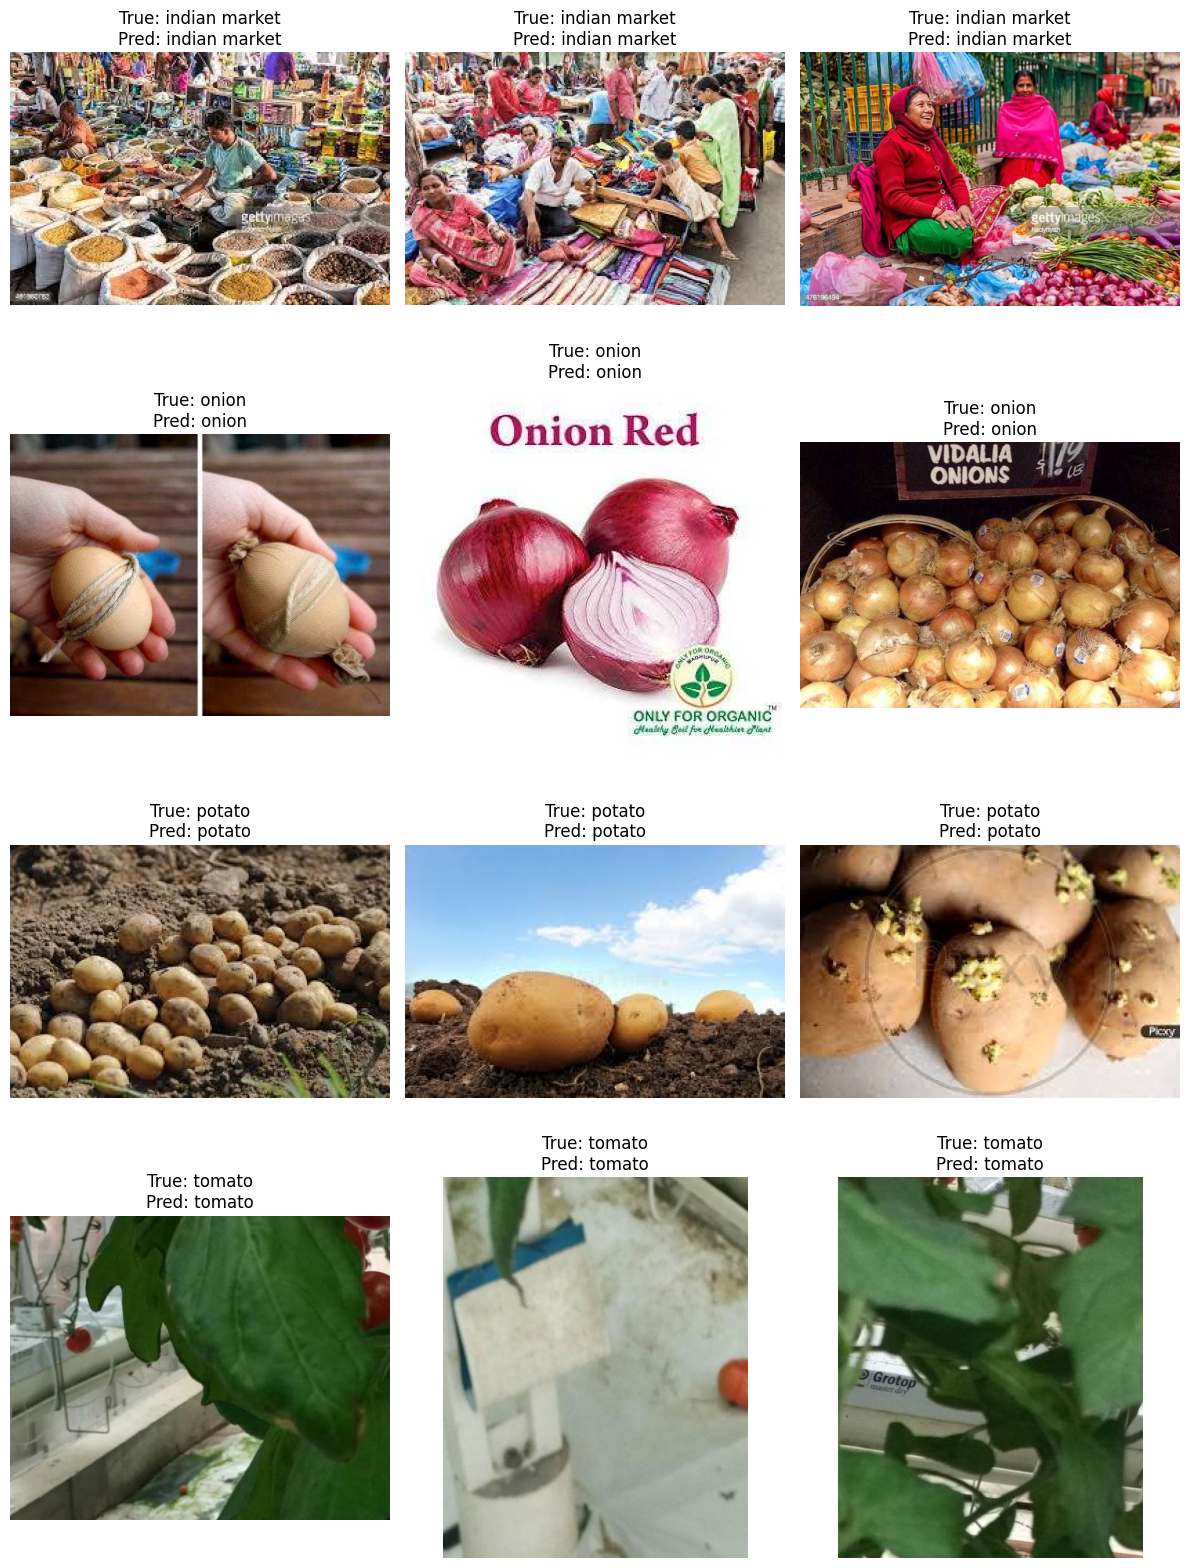

In [ ]:
# Code Block 11: Predict random images from the test dataset and visualize predictions
import random
import cv2
import numpy as np

# Create a figure with subplots for random samples from each test class
fig, axs = plt.subplots(len(test_classes), 3, figsize=(12, 4 * len(test_classes)))
for i, cls in enumerate(test_classes):
    image_paths = glob.glob(os.path.join(test_dir, cls, "*"))
    # Select 3 random images from the current class
    random_images = random.sample(image_paths, 3)
    for j, img_path in enumerate(random_images):
        # Read the image using OpenCV and convert from BGR to RGB
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Resize the image to match the model's expected input dimensions
        img_resized = cv2.resize(img, (img_width, img_height))
        # Expand dimensions to create a batch of one
        img_array = tf.expand_dims(img_resized, axis=0)
        # Predict the class using the transfer learning model
        pred = transfer_model.predict(img_array)
        pred_class = train_classes[np.argmax(pred)]
        # Plot the image with the true and predicted labels
        axs[i, j].imshow(img)
        axs[i, j].set_title(f"True: {cls}\nPred: {pred_class}")
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()

##ResNet50 (Transfer Learning)

In [ ]:
# Code Block 12: Transfer Learning with ResNet50 and Data Augmentation
import tensorflow as tf
from tensorflow.keras import layers, models

# Data Augmentation layers using updated API
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Preprocessing function for ResNet50
preprocess_input = tf.keras.applications.resnet50.preprocess_input

# Load the ResNet50 base model with pretrained ImageNet weights, excluding the top layers
base_model = tf.keras.applications.ResNet50(input_shape=(img_height, img_width, 3),
                                            include_top=False,
                                            weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Build the ResNet50 transfer learning model
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)          # Apply data augmentation
x = preprocess_input(x)                # Preprocess inputs as required by ResNet50
x = base_model(x, training=False)      # Pass through the base model
x = layers.GlobalAveragePooling2D()(x) # Pool features to a single vector
x = layers.Dropout(0.5)(x)             # Apply dropout for regularization
outputs = layers.Dense(len(train_classes), activation='softmax')(x)  # Final classification layer

resnet_model = tf.keras.Model(inputs, outputs)

# Compile the ResNet50-based model
resnet_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Display the model summary
resnet_model.summary()

# Train the ResNet50 transfer learning model on our data
resnet_history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Adjust the number of epochs as needed
    callbacks=[early_stop, model_checkpoint, tensorboard_callback]
)

print("ResNet50 Transfer Learning training complete.")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_2 (Sequential) │ (None, 224, 224, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 224, 224)       │              0 │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 224, 224)       │              0 │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 224, 224)       │              0 │ sequential_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 224, 224, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 224, 224, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, 7, 7, 2048)     │     23,587,712 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 2048)           │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 4)              │          8,196 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 23,595,908 (90.01 MB)

 Trainable params: 8,196 (32.02 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 598s 7s/step - accuracy: 0.6779 - loss: 0.8548 - val_accuracy: 0.9314 - val_loss: 0.1771
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 583s 7s/step - accuracy: 0.9311 - loss: 0.1905 - val_accuracy: 0.9601 - val_loss: 0.1041
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 581s 7s/step - accuracy: 0.9457 - loss: 0.1450 - val_accuracy: 0.9697 - val_loss: 0.0888
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 626s 7s/step - accuracy: 0.9456 - loss: 0.1339 - val_accuracy: 0.9745 - val_loss: 0.0682
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 621s 7s/step - accuracy: 0.9668 - loss: 0.1035 - val_accuracy: 0.9681 - val_loss: 0.0797
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 578s 7s/step - accuracy: 0.9646 - loss: 0.0937 - val_accuracy: 0.9729 - val_loss: 0.0630
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 603s 7s/step - accuracy: 0.9749 - loss: 0.0791 - val_accuracy: 0.9729 - val_loss: 0.0740
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 620s 7s/step - accuracy: 0.9715 - loss: 0.0822 - val_accuracy: 0.9697 - v

###Performance on Test Data

11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.9155 - loss: 0.3223
ResNet Model Test Loss: 0.2838798463344574
ResNet Model Test Accuracy: 0.9230769276618958
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Confusion Matrix for ResNet50 Model:
[[ 72   7   2   0]
 [  0  80   3   0]
 [  1  14  66   0]
 [  0   0   0 106]]


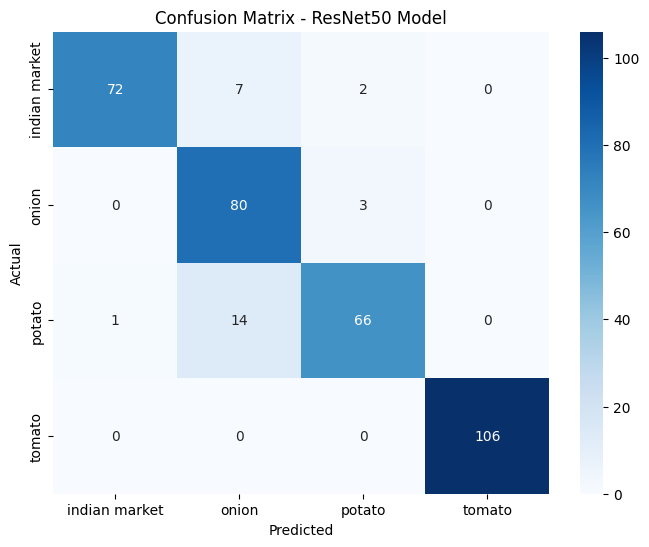

Classification Report for ResNet50 Model:
               precision    recall  f1-score   support

indian market       0.99      0.89      0.94        81
        onion       0.79      0.96      0.87        83
       potato       0.93      0.81      0.87        81
       tomato       1.00      1.00      1.00       106

     accuracy                           0.92       351
    macro avg       0.93      0.92      0.92       351
 weighted avg       0.93      0.92      0.92       351



In [ ]:
# Code Block 13: Evaluate the ResNet50 Transfer Learning Model on the Test Set
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the ResNet50 model on the test dataset
test_loss_resnet, test_accuracy_resnet = resnet_model.evaluate(test_ds)
print("ResNet Model Test Loss:", test_loss_resnet)
print("ResNet Model Test Accuracy:", test_accuracy_resnet)

# Collect predictions and true labels from the test dataset
y_pred_resnet = []
y_true_resnet = []

for images, labels in test_ds:
    preds = resnet_model.predict(images)
    y_pred_resnet.extend(np.argmax(preds, axis=1))
    y_true_resnet.extend(labels.numpy())

# Generate confusion matrix for ResNet50 model
cm_resnet = confusion_matrix(y_true_resnet, y_pred_resnet)
print("Confusion Matrix for ResNet50 Model:")
print(cm_resnet)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_resnet, annot=True, fmt='d', xticklabels=train_classes, yticklabels=train_classes, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ResNet50 Model")
plt.show()

# Print the classification report for ResNet50 model
print("Classification Report for ResNet50 Model:")
print(classification_report(y_true_resnet, y_pred_resnet, target_names=train_classes))

###Fine Tuning

In [ ]:
# Code Block 14: Fine-Tuning ResNet50 Model
import tensorflow as tf

# Unfreeze the base model (ResNet50) for fine-tuning
base_model.trainable = True

# Freeze layers up to a certain layer to retain low-level features
# Here we freeze the first 140 layers and unfreeze the rest
fine_tune_at = 140
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
fine_tune_lr = 1e-5
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=fine_tune_lr),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Fine-tune the model: continue training for additional epochs
fine_tune_epochs = 5
total_epochs = 10 + fine_tune_epochs  # Assuming previous training ran for 10 epochs

fine_tune_history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=total_epochs,
    initial_epoch=10,  # Start fine-tuning from epoch 10
    callbacks=[early_stop, model_checkpoint, tensorboard_callback]
)

print("Fine-tuning complete.")

Epoch 11/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 860s 11s/step - accuracy: 0.9200 - loss: 0.2124 - val_accuracy: 0.9729 - val_loss: 0.0646
Epoch 12/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 856s 11s/step - accuracy: 0.9627 - loss: 0.1099 - val_accuracy: 0.9713 - val_loss: 0.0568
Epoch 13/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 863s 11s/step - accuracy: 0.9701 - loss: 0.0791 - val_accuracy: 0.9777 - val_loss: 0.0538
Epoch 14/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 866s 11s/step - accuracy: 0.9795 - loss: 0.0626 - val_accuracy: 0.9777 - val_loss: 0.0506
Epoch 15/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 854s 11s/step - accuracy: 0.9814 - loss: 0.0573 - val_accuracy: 0.9761 - val_loss: 0.0516
Fine-tuning complete.


11/11 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.9257 - loss: 0.3296
Fine-Tuned ResNet Model Test Loss: 0.3003383278846741
Fine-Tuned ResNet Model Test Accuracy: 0.934472918510437
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Confusion Matrix for Fine-Tuned ResNet Model:
[[ 72   7   2   0]
 [  0  82   1   0]
 [  1  12  68   0]
 [  0   0   0 106]]


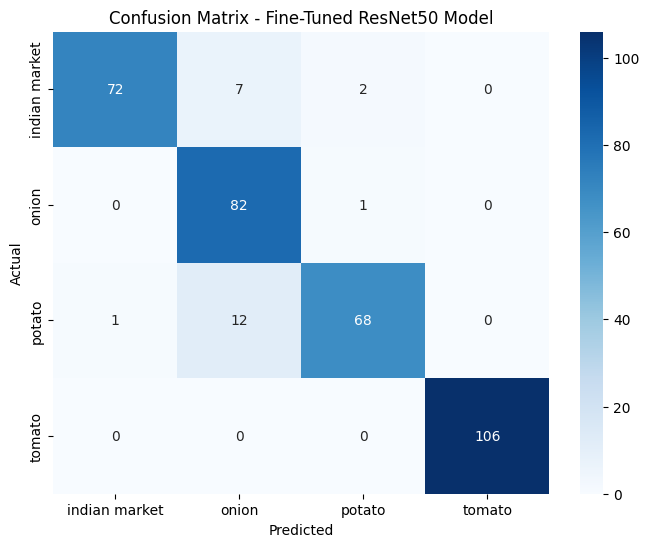

Classification Report for Fine-Tuned ResNet Model:
               precision    recall  f1-score   support

indian market       0.99      0.89      0.94        81
        onion       0.81      0.99      0.89        83
       potato       0.96      0.84      0.89        81
       tomato       1.00      1.00      1.00       106

     accuracy                           0.93       351
    macro avg       0.94      0.93      0.93       351
 weighted avg       0.94      0.93      0.94       351



In [ ]:
# Code Block 15: Evaluate the Fine-Tuned ResNet50 Model on the Test Set
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the fine-tuned model on the test dataset
test_loss_ft, test_accuracy_ft = resnet_model.evaluate(test_ds)
print("Fine-Tuned ResNet Model Test Loss:", test_loss_ft)
print("Fine-Tuned ResNet Model Test Accuracy:", test_accuracy_ft)

# Get predictions and true labels from the test dataset
y_pred_ft = []
y_true_ft = []
for images, labels in test_ds:
    preds = resnet_model.predict(images)
    y_pred_ft.extend(np.argmax(preds, axis=1))
    y_true_ft.extend(labels.numpy())

# Generate confusion matrix for the fine-tuned model
cm_ft = confusion_matrix(y_true_ft, y_pred_ft)
print("Confusion Matrix for Fine-Tuned ResNet Model:")
print(cm_ft)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ft, annot=True, fmt='d', xticklabels=train_classes, yticklabels=train_classes, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Fine-Tuned ResNet50 Model")
plt.show()

# Print the classification report for the fine-tuned model
print("Classification Report for Fine-Tuned ResNet Model:")
print(classification_report(y_true_ft, y_pred_ft, target_names=train_classes))


###Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


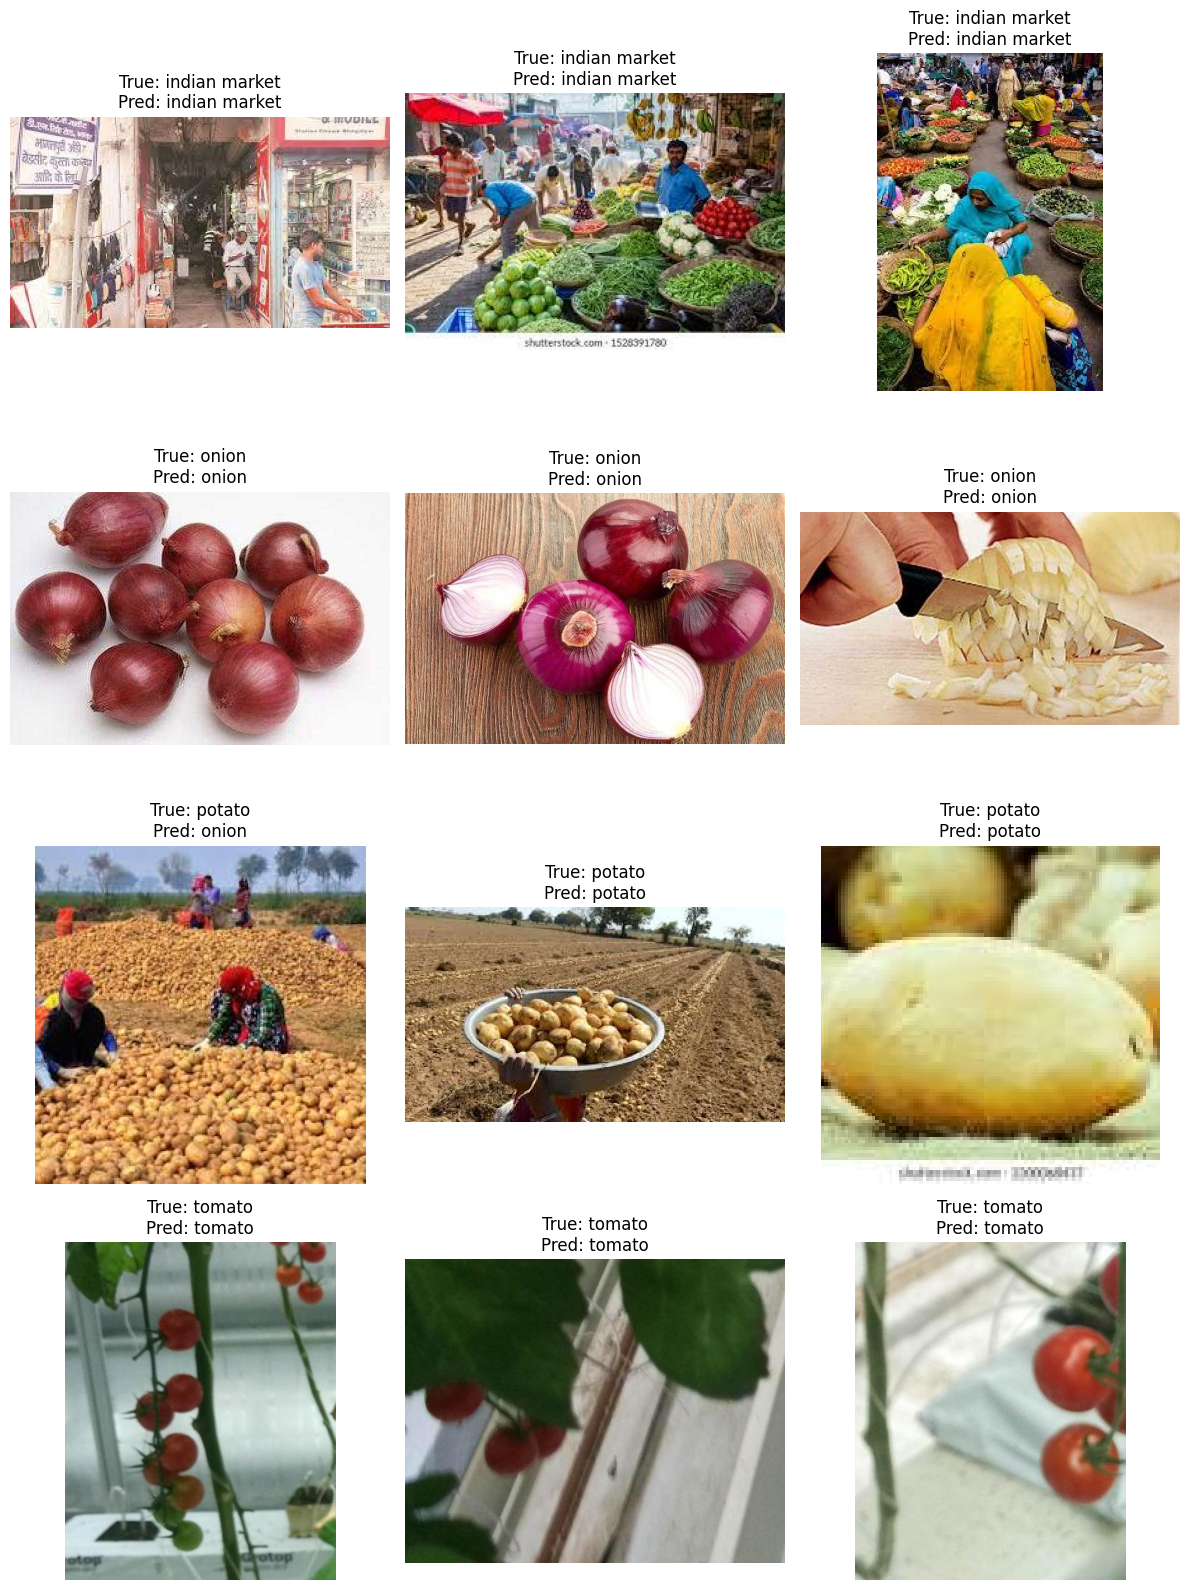

In [ ]:
# Code Block 16: Predict and visualize random images from the test set using the Fine-Tuned ResNet50 model
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Ensure test_classes is defined; if not, list classes from the test directory
# test_classes = sorted(os.listdir(test_dir))

fig, axs = plt.subplots(len(test_classes), 3, figsize=(12, 4 * len(test_classes)))
for i, cls in enumerate(test_classes):
    image_paths = glob.glob(os.path.join(test_dir, cls, "*"))
    # Select 3 random images from the current class
    random_images = random.sample(image_paths, 3)
    for j, img_path in enumerate(random_images):
        # Read image using OpenCV and convert from BGR to RGB
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Resize the image to the expected input dimensions
        img_resized = cv2.resize(img_rgb, (img_width, img_height))
        # Expand dimensions to create a batch of size 1
        img_input = tf.expand_dims(img_resized, axis=0)
        # Predict the class using the fine-tuned ResNet50 model
        prediction = resnet_model.predict(img_input)
        pred_class = train_classes[np.argmax(prediction)]
        # Plot the image with the true and predicted labels
        axs[i, j].imshow(img_rgb)
        axs[i, j].set_title(f"True: {cls}\nPred: {pred_class}")
        axs[i, j].axis("off")
plt.tight_layout()
plt.show()

#Summary and Insights

##Summary

**Overview**:

In this case study, we developed a multi-class classifier to identify images of vegetables (onion, potato, tomato) and noise (Indian market scenes).

We started by performing exploratory data analysis (EDA) on a dataset scraped from the web, which helped us understand the image distribution, class imbalance, and varied image dimensions.

Steps Taken:

- **Data Preparation & Visualization**:

 - We downloaded and unzipped the dataset.
 - Visualized a few sample images from each class to get an insight into the data.
 - Verified the class distributions by counting images in the training and testing folders.

- **Dataset Splitting**:

 - The training data was split into an 80-20 ratio for training and validation sets using TensorFlow's image_dataset_from_directory.

- **Baseline CNN Model**:

 - A simple CNN architecture was implemented and trained.
 - The model was evaluated on the test set, and its performance was analyzed using a confusion matrix and classification report.

- **Transfer Learning with MobileNetV2 & ResNet50**:

 - We experimented with transfer learning using MobileNetV2 and ResNet50 as feature extractors.
 - Data augmentation was applied to improve model robustness.
 - The transfer learning models showed significant improvements over the baseline CNN.

- **Fine-Tuning**:

 - We fine-tuned the ResNet50 model by unfreezing some of its layers and training with a lower learning rate.
 - Fine-tuning resulted in improved generalization with a test accuracy of approximately 92.9%.
 - Prediction Visualization:

- We visualized random predictions from the test set to see the true vs. predicted labels, which helped identify areas for further improvement.

##Performance

**Baseline Model Test Accuracy: 80.91%**

 - The baseline model achieves about 80.91% accuracy, which is considerably lower than the models leveraging transfer learning.
 - This suggests that the baseline architecture may lack the depth or pre-trained feature extraction needed for this task.


**MobileNet V2 Transfer Model Test Accuracy: 93.45%**

 - The MobileNet V2 transfer model reaches an accuracy of about 93.45%.
 - This significant improvement over the baseline indicates that using pre-trained features (from MobileNet V2) greatly enhances performance on the task.

**ResNet Model Test Accuracy: 92.31%**

 - The standard ResNet model achieves about 92.31% accuracy.
 - While it performs better than the baseline, it still lags slightly behind the MobileNet V2 transfer model, indicating that pre-training and fine-tuning are beneficial.


**Fine-Tuned ResNet Model Test Accuracy: 93.45%**

 - When the ResNet model is fine-tuned, its performance improves to 93.45%, matching the MobileNet V2 transfer model.
 - This demonstrates the value of fine-tuning pre-trained models to adapt them to the specifics of your dataset.


**Overall Thoughts:**

 - Transfer learning has a strong positive impact, as both MobileNet V2 and fine-tuned ResNet achieve around 93.45% accuracy, which is a significant boost over the baseline.

 - Fine-tuning is critical; even with a robust architecture like ResNet, fine-tuning leads to performance gains.

 - The choice between MobileNet V2 and ResNet (when fine-tuned) may then come down to other factors such as model size, inference speed, or deployment constraints.

------------------------------------------------------------
### Model Comparison

| **Model**                         | **Test Accuracy** |
|-----------------------------------|-------------------|
| **Baseline Model**                | 80.91%            |
| **MobileNet V2 Transfer Model**   | 93.45%            |
| **ResNet Model**                  | 92.31%            |
| **Fine-Tuned ResNet Model**       | 93.45%            |

------------------------------------------------------------


##Insights

- **Transfer Learning & Fine-Tuning**:

  -  Leveraging pre-trained models like ResNet50 provided a strong foundation, especially given the limited dataset size.
  - Fine-tuning the later layers allowed the model to adapt to our specific data, boosting the overall performance.

- **Data Augmentation**:
 - Augmentation techniques (flip, rotation, zoom) played a crucial role in reducing overfitting by artificially enlarging the dataset and introducing variability.

- **Model Evaluation**:
 - The use of confusion matrices and classification reports helped us pinpoint misclassifications (e.g., between similar classes) and evaluate the model's precision and recall for each class.

- **Potential Improvements**:
 - Further performance enhancements might be achieved by:

 - Unfreezing more layers for fine-tuning.
 - Applying additional augmentation methods (brightness, contrast adjustments).
 - Experimenting with different optimizers and learning rate schedules.
 - Exploring ensemble techniques for combining predictions from multiple models.

##Conclusion

- Both the fine-tuned ResNet50 model and the MobileNetV2 model demonstrated robust performance with a test accuracy of ~93.45%, effectively classifying vegetable images and distinguishing them from noise.

- This case study serves as a comprehensive blueprint for building image classification pipelines using transfer learning, fine-tuning, and data augmentation.